#### Libraries

In [1]:
import os
import math

# YC4
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pickle
from pysat.solvers import Glucose3
import numpy as np

#### Exercise 1

In [2]:
# YC1_1
class EightQueenSolver:
    def __init__(self):
        self.solution = [0 for _ in range(8)]
        self.constraints = {}

    def solve(self):
        result = self.backtracking_search({})
        self.print_solution(result)


    def backtracking_search(self, assignment):
        if len(assignment) == 8:
            return assignment

        var = self.select_unassigned_variable(assignment)
        for value in self.order_domain_values(var, assignment):
            if self.is_consistent(var, value, assignment):
                assignment[var] = value
                result = self.backtracking_search(assignment)
                if result:
                    return result
                del assignment[var]

        return False

    def select_unassigned_variable(self, assignment):
        for i in range(8):
            if i not in assignment:
                return i

    def order_domain_values(self, var, assignment):
        domain = list(range(8))
        for value in assignment.values():
            if value in domain:
                domain.remove(value)
        return domain

    def is_consistent(self, var, value, assignment):
        for i, v in assignment.items():
            if v == value or abs(i - var) == abs(v - value):
                return False
        return True

    def print_solution(self, assignment):
        for col in range(8):
            for row in range(8):
                if assignment.get(row, None) == col:
                    print('Q', end=' ')
                else:
                    print('.', end=' ')
            print()



# YC1_2
class NQueenSolver:
    def __init__(self, N: int):
        self.N = N
        self.board = [['.' for _ in range(N)] for _ in range(N)]
        self.constraints = {}

    def solve(self):
        assignment = {}
        if self.backtracking_search(assignment):
            self.print_solution(assignment)
        else:
            print('UNSOLVABLE')

    def backtracking_search(self, assignment):
        if len(assignment) == self.N:
            return True

        var = self.select_unassigned_variable(assignment)
        for value in self.order_domain_values(var, assignment):
            if self.is_consistent(var, value, assignment):
                assignment[var] = value
                if self.backtracking_search(assignment):
                    return True
                del assignment[var]

        return False

    def select_unassigned_variable(self, assignment):
        for i in range(self.N):
            if i not in assignment:
                return i

    def order_domain_values(self, var, assignment):
        domain = list(range(self.N))
        for value in assignment.values():
            if value in domain:
                domain.remove(value)
        return domain

    def is_consistent(self, var, value, assignment):
        for i, v in assignment.items():
            if v == value or abs(i - var) == abs(v - value):
                return False
        return True

    def print_solution(self,assignment):
        for i in range(self.N):
            for j in range(self.N):
                if j == assignment[i]:
                    print('Q', end=' ')
                else:
                    print('.', end=' ')
            print()            

#### Demo

##### YC1_1

In [3]:
result = EightQueenSolver()
result.solve()

Q . . . . . . . 
. . . . . . Q . 
. . . . Q . . . 
. . . . . . . Q 
. Q . . . . . . 
. . . Q . . . . 
. . . . . Q . . 
. . Q . . . . . 


##### YC1_2

In [4]:
result = NQueenSolver(17)
result.solve()

Q . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . 
. . . . Q . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . 
. . . . . . . Q . . . . . . . . . 
. . . . . . . . . . Q . . . . . . 
. . . . . . . . . . . . . . Q . . 
. . . . . . Q . . . . . . . . . . 
. . . . . . . . . . . . . . . Q . 
. . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . Q 
. . . Q . . . . . . . . . . . . . 
. . . . . Q . . . . . . . . . . . 
. . . . . . . . Q . . . . . . . . 
. . . . . . . . . . . Q . . . . . 
. . . . . . . . . Q . . . . . . . 
. . . . . . . . . . . . Q . . . . 


#### Exercise 2

In [5]:
# YC2_1
class Node:
	def __init__(self, identifier=None, value=None):
		if (identifier == None and value == None):
			self.identifier = None
			self.value = None
		elif (value == None):
			self.identifier = identifier
			self.value = None
		else:
			self.identifier = identifier
			self.value = value
	
	def __str__(self):
		return f"({self.identifier}, {self.value})"


class MinimaxDecision:
	def __init__(self, filename):
		self.root, self.terminalStates, self.successors = MinimaxDecision.read(filename)

	def read(filename):
		root = None
		terminalStates = dict()
		successors = dict()

		if os.path.exists(filename):
			with open(filename) as f:
				E, L = [int(it) for it in f.readline().split()]
			
				count = 0
				for line in f:
					a, b = [it for it in line.strip().split()]
					isNodeExistInSuccessorKey = False
					for node in successors.keys():
						if node.identifier == a:
							isNodeExistInSuccessorKey = True
							successors[node].append(Node(b))
							break
					if(not isNodeExistInSuccessorKey):
						if (a == "n00"):
							root = Node(a)
							successors[root] = [Node(b)]
						else:  
							successors[Node(a)] = [Node(b)]         
					
					count += 1
					if (count == E):
						break
			
				for line in f:
					it = line.strip().split()
					n = it[0]
					v = int(it[1])
					terminalStates[n] = v
    
		return root, terminalStates, successors

# YC2_2
	def print(self):
		MinimaxDecision.recursive_backtracking(self, self.root)

	def recursive_backtracking(self, node: Node):
		if node is None:
			return
				
		print(node)

		# Find successors of current node
		children = None
		for key in self.successors.keys(): # key: Node
			if (node.identifier == key.identifier):
				children = self.successors.get(key)
				break
				
		if (children == None): # node has no child => leaf
			return
		else:
			for i in range(0, len(children)):
				MinimaxDecision.recursive_backtracking(self, children[i])

# YC2_3
	def run(self):
		MinimaxDecision.minimax_decision(self, self.root)
		

	def minimax_decision(self, state: Node):
		v = float('-inf')
		
		for action in self.successors.get(state):
			if (v < MinimaxDecision.min_value(self, action)):
				v =  MinimaxDecision.min_value(self, action)
		
		state.value = v
		
		return v

	def max_value(self, state: Node):
		if (state.identifier in self.terminalStates): # terminal-test(state)
			state.value = self.terminalStates.get(state.identifier)
			return self.terminalStates.get(state.identifier) # utility(state)
		
		v = float('-inf')

		actions = None
		for key in self.successors.keys(): # key: Node
			if (state.identifier == key.identifier):
				actions = self.successors.get(key)
				break

		for a in actions:
			v = max(v, MinimaxDecision.min_value(self, a))
		
		state.value = v
		
		return v

	def min_value(self, state: Node):
		if (state.identifier in self.terminalStates): # terminal-test(state)
			state.value = self.terminalStates.get(state.identifier)
			return self.terminalStates.get(state.identifier) # utility(state)
		
		v = float('inf')
		
		actions = None
		for key in self.successors.keys(): # key: Node
			if (state.identifier == key.identifier):
				actions = self.successors.get(key)
				break
		
		for a in actions:
			v = min(v, MinimaxDecision.max_value(self, a))
		
		state.value = v
		
		return v

#### Demo

In [6]:
md = MinimaxDecision("sample_inputs/minimax.txt")

##### YC2_1

###### terminalStates

In [7]:
for node_identifier, value in md.terminalStates.items():
  print(f"{node_identifier}: {value}")

n41: 4
n42: 3
n43: 5
n44: 2
n45: 1
n46: 4
n47: 2
n48: 3
n49: 5
n410: 4
n411: 7
n412: 3
n413: 2
n414: 1
n415: 4
n416: 0
n417: 5
n418: 3
n419: 0
n420: 2
n421: 7
n422: 4
n423: 3
n424: 6
n425: 5
n426: 3
n427: 1


###### successors

In [8]:
for node, list_successor in md.successors.items():
  print(f"{node.identifier}: {'[' + ', '.join([str(successor_node.identifier) for successor_node in list_successor]) + ']'}")

n00: [n10, n11]
n10: [n20, n21, n22]
n11: [n23, n24, n25]
n20: [n30, n31]
n21: [n32]
n22: [n33, n34, n35]
n23: [n36]
n24: [n37, n38]
n25: [n39, n310, n311]
n30: [n41, n42, n43]
n31: [n44, n45]
n32: [n46, n47, n48]
n33: [n49, n410]
n34: [n411]
n35: [n412, n413]
n36: [n414, n415, n416]
n37: [n417, n418]
n38: [n419]
n39: [n420, n421, n422]
n310: [n423, n424]
n311: [n425, n426, n427]


##### YC2_2

In [9]:
md.print()

(n00, None)
(n10, None)
(n20, None)
(n30, None)
(n41, None)
(n42, None)
(n43, None)
(n31, None)
(n44, None)
(n45, None)
(n21, None)
(n32, None)
(n46, None)
(n47, None)
(n48, None)
(n22, None)
(n33, None)
(n49, None)
(n410, None)
(n34, None)
(n411, None)
(n35, None)
(n412, None)
(n413, None)
(n11, None)
(n23, None)
(n36, None)
(n414, None)
(n415, None)
(n416, None)
(n24, None)
(n37, None)
(n417, None)
(n418, None)
(n38, None)
(n419, None)
(n25, None)
(n39, None)
(n420, None)
(n421, None)
(n422, None)
(n310, None)
(n423, None)
(n424, None)
(n311, None)
(n425, None)
(n426, None)
(n427, None)


##### YC2_3

In [10]:
md.run()
md.print()

(n00, 2)
(n10, 2)
(n20, 3)
(n30, 3)
(n41, 4)
(n42, 3)
(n43, 5)
(n31, 1)
(n44, 2)
(n45, 1)
(n21, 2)
(n32, 2)
(n46, 4)
(n47, 2)
(n48, 3)
(n22, 7)
(n33, 4)
(n49, 5)
(n410, 4)
(n34, 7)
(n411, 7)
(n35, 2)
(n412, 3)
(n413, 2)
(n11, 0)
(n23, 0)
(n36, 0)
(n414, 1)
(n415, 4)
(n416, 0)
(n24, 3)
(n37, 3)
(n417, 5)
(n418, 3)
(n38, 0)
(n419, 0)
(n25, 3)
(n39, 2)
(n420, 2)
(n421, 7)
(n422, 4)
(n310, 3)
(n423, 3)
(n424, 6)
(n311, 1)
(n425, 5)
(n426, 3)
(n427, 1)


#### Exercise 3


##### YC3_1

In [11]:
## YC3_1
class EightQueenSolver:
 
    # Convert index of matrix to number for using in Glucose3 module
    def to_var(self, i, j, m):
        return i * m + j + 1

    def EightQueenSolver(self):
        clauses = []
        for i in range(8):
            # Kiểm tra đường ngang so với ô hiện tại
            clauses.append([self.to_var(i, j, 8) for j in range(8)])
            # Kiểm tra đường dọc so với ô hiện tại
            clauses.append([self.to_var(j, i, 8) for j in range(8)])
            for j in range(8):
                for h in range(8):
                    if h != i:
                        clauses.append([- self.to_var(i, j, 8), - self.to_var(h, j, 8)])
                for k in range(8):
                    if k != j:
                        clauses.append([- self.to_var(i, j, 8), - self.to_var(i, k, 8)])
                # Kiểm tra đường chéo chính
                m = i + 1
                n = j + 1
                while (m <= 7 and n <= 7):
                    clauses.append([- self.to_var(i, j, 8), - self.to_var(m, n, 8)])
                    m += 1
                    n += 1

                m = i - 1
                n = j - 1
                while (m >= 0 and n >= 0):
                    clauses.append([- self.to_var(i, j, 8), - self.to_var(m, n, 8)])
                    m -= 1
                    n -= 1
                # Kiểm tra đường chéo phụ
                m = i + 1
                n = j - 1
                while (m <= 7 and n >= 0):
                    clauses.append([- self.to_var(i, j, 8), - self.to_var(m, n, 8)])
                    m += 1
                    n -= 1
                m = i - 1
                n = j + 1
                while (m >= 0 and n <= 7):
                    clauses.append([- self.to_var(i, j, 8), - self.to_var(m, n, 8)])
                    m -= 1
                    n += 1
        return clauses
    
    def solver(self):
        solver = Glucose3()
        clauses = self.EightQueenSolver()

        for clause in clauses:
            # Thêm các mệnh đề CNF vào thư viện Glucose3
            solver.add_clause(clause)
        result_matrix = solver.solve()
        if result_matrix:
            model = solver.get_model()
            matrix = np.array_split(model, 8)
            for i in matrix:
                for k in i:
                    if k > 0:
                        print("Q ", end='')
                    else:
                        print(". ", end='')
                print("\n")

###### Testcase YC3_1

In [12]:
testcase1 = EightQueenSolver()

testcase1.solver()

. . . Q . . . . 

. Q . . . . . . 

. . . . . . Q . 

. . Q . . . . . 

. . . . . Q . . 

. . . . . . . Q 

. . . . Q . . . 

Q . . . . . . . 



##### YC3_2

In [13]:
class NQueenSolver():

    def __init__(self, N = 8) -> None:
        self._N = N

    def set_N(self, N):
        self._N = N

    def to_var(self, i, j, m):
        return i * m + j + 1
    
    def NQueenSolver(self, N):
        clauses = []
        for i in range(N):
            clauses.append([self.to_var(i, j, N) for j in range(N)])
            clauses.append([self.to_var(j, i, N) for j in range(N)])
            for j in range(N):
                for h in range(N):
                    if h != i:
                        clauses.append([- self.to_var(j, i, N), - self.to_var(j, h, N)])
                for k in range(N):
                    if k != j:
                        clauses.append([- self.to_var(i, j, N), - self.to_var(i, k, N)])
                m = i + 1
                n = j + 1
                while (m <= N - 1 and n <= N - 1):
                    clauses.append([- self.to_var(i, j, N), - self.to_var(m, n, N)])
                    m += 1
                    n += 1

                m = i - 1
                n = j - 1
                while (m >= 0 and n >= 0):
                    clauses.append([- self.to_var(i, j, N), - self.to_var(m, n, N)])
                    m -= 1
                    n -= 1
                m = i + 1
                n = j - 1
                while (m <= N - 1 and n >= 0):
                    clauses.append([- self.to_var(i, j, N), - self.to_var(m, n, N)])
                    m += 1
                    n -= 1
                m = i - 1
                n = j + 1
                while (m >= 0 and n <= N - 1):
                    clauses.append([- self.to_var(i, j, N), - self.to_var(m, n, N)])
                    m -= 1
                    n += 1
        return clauses
    def solver(self):
        solver = Glucose3()
        clauses = self.NQueenSolver(self._N)

        for clause in clauses:
            solver.add_clause(clause)
        result_matrix = solver.solve()
        if result_matrix:
            model = solver.get_model()
            matrix = np.array_split(model, self._N)
            for i in matrix:
                for k in i:
                    if k > 0:
                        print("Q ", end='')
                    else:
                        print(". ", end='')
                print("\n")
        else:
            print("UNSOLVABLE")

###### Testcase YC3_2

In [14]:
testcase2 = NQueenSolver()
testcase2.set_N(20)
testcase2.solver()

. . . . . . . . Q . . . . . . . . . . . 

. . . . . . . . . . Q . . . . . . . . . 

. . . . . . . Q . . . . . . . . . . . . 

. . . . . . . . . Q . . . . . . . . . . 

. . . . . . Q . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . Q . . . . 

. . . . . . . . . . . . . . . . . Q . . 

. . . . . . . . . . . . . . . . . . . Q 

. . . . . Q . . . . . . . . . . . . . . 

. . . . . . . . . . . . Q . . . . . . . 

. . . . . . . . . . . . . . Q . . . . . 

. . . . . . . . . . . Q . . . . . . . . 

. . . . . . . . . . . . . Q . . . . . . 

. . Q . . . . . . . . . . . . . . . . . 

. . . . Q . . . . . . . . . . . . . . . 

. Q . . . . . . . . . . . . . . . . . . 

. . . Q . . . . . . . . . . . . . . . . 

Q . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . Q . . . 

. . . . . . . . . . . . . . . . . . Q . 



#### Exercise 4

##### YC4_1

Training accuracy: 1.0
Testing accuracy: 0.8769
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4


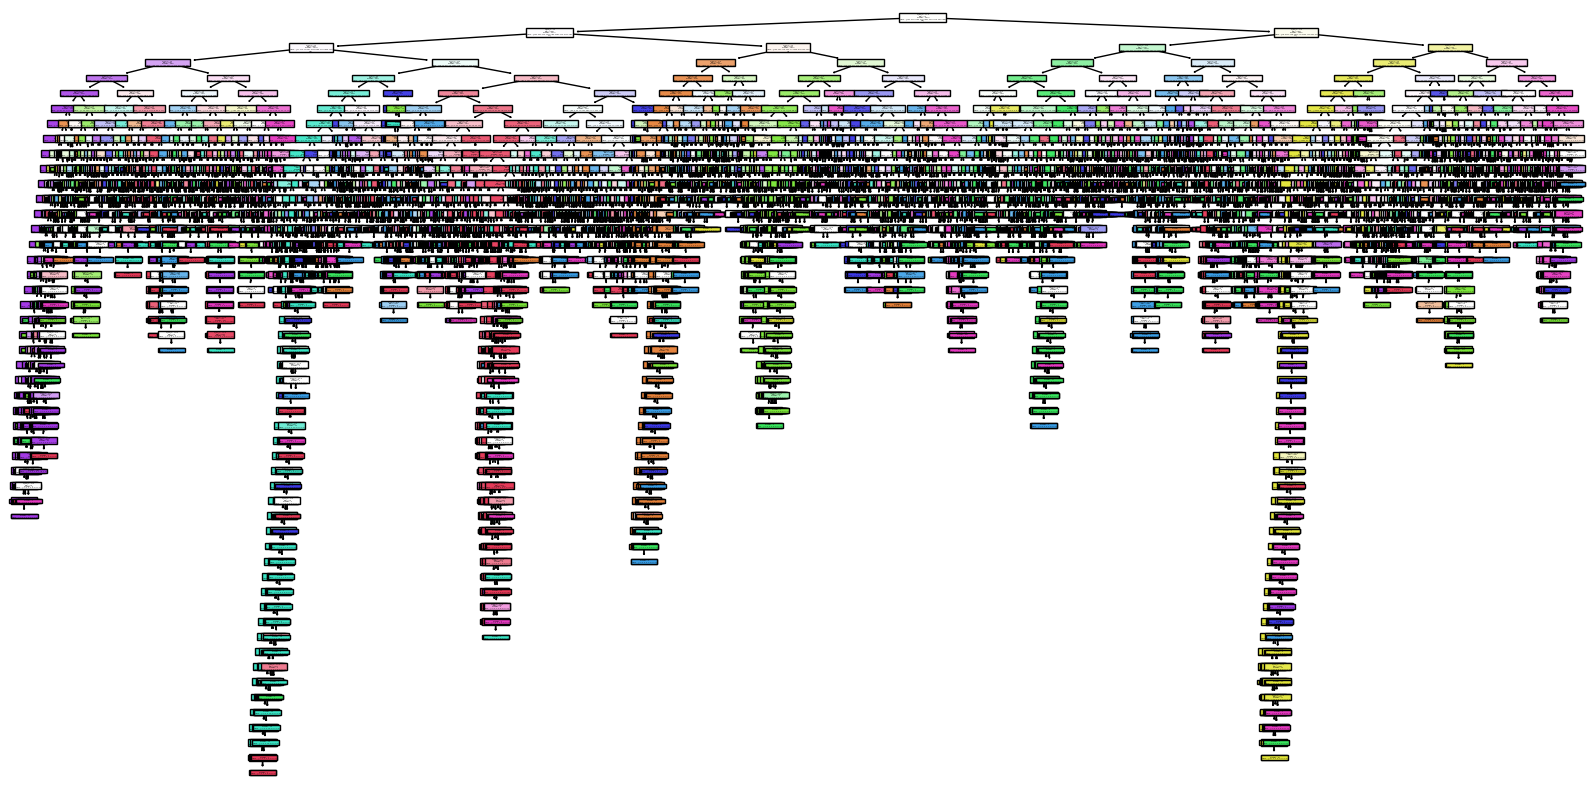

In [15]:
# YC4_1 
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

model = DecisionTreeClassifier()
model.fit(train_X, train_y)

train_preds = model.predict(train_X)
DTM_train_acc = accuracy_score(train_y, train_preds)
print(f'Training accuracy: {DTM_train_acc}')

test_preds = model.predict(test_X)
DTM_test_acc = accuracy_score(test_y, test_preds)
print(f'Testing accuracy: {DTM_test_acc}')

with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('decision_tree_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

samples = test_X[:5]
preds = loaded_model.predict(samples)
for i in range(len(preds)):
    print(f'Predicted: {preds[i]}, Actual: {test_y[i]}')

plt.figure(figsize=(20,10))
plot_tree(model, filled=True)
plt.show()

##### YC4_2

In [16]:
# YC4_2
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

model = GaussianNB()
model.fit(train_X, train_y)

train_preds = model.predict(train_X)
NBC_train_acc = accuracy_score(train_y, train_preds)
print(f'Training accuracy: {NBC_train_acc}')

test_preds = model.predict(test_X)
NBC_test_acc = accuracy_score(test_y, test_preds)
print(f'Testing accuracy: {NBC_test_acc}')

with open('naive_bayes_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('naive_bayes_classifier_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

samples = test_X[:5]
preds = loaded_model.predict(samples)
for i in range(len(preds)):
    print(f'Predicted: {preds[i]}, Actual: {test_y[i]}')

Training accuracy: 0.5649
Testing accuracy: 0.5558
Predicted: 9, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 9, Actual: 4


##### YC4_3

In [17]:
# YC4_3
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

model = KNeighborsClassifier()
model.fit(train_X, train_y)

train_preds = model.predict(train_X)
KNN_train_acc = accuracy_score(train_y, train_preds)
print(f'Training accuracy: {KNN_train_acc}')

test_preds = model.predict(test_X)
KNN_test_acc = accuracy_score(test_y, test_preds)
print(f'Testing accuracy: {KNN_test_acc}')

with open('K-NN_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('K-NN_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

samples = test_X[:5]
preds = loaded_model.predict(samples)
for i in range(len(preds)):
    print(f'Predicted: {preds[i]}, Actual: {test_y[i]}')

Training accuracy: 0.9819166666666667
Testing accuracy: 0.9688
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4


##### YC4_4

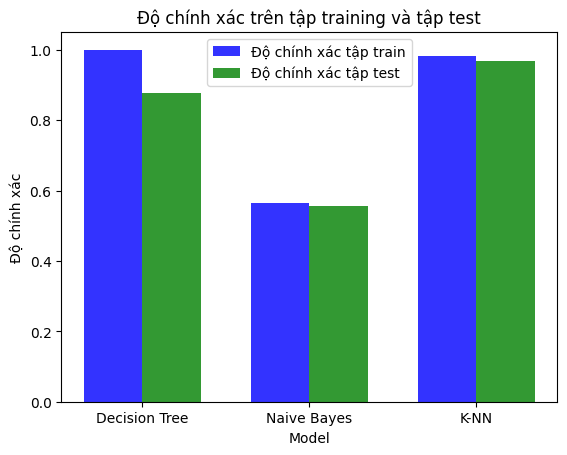

In [18]:
# YC4_4
import matplotlib.pyplot as plt

models = ['Decision Tree', 'Naive Bayes', 'K-NN']
train_acc = [DTM_train_acc, NBC_train_acc, KNN_train_acc]
test_acc = [DTM_test_acc, NBC_test_acc, KNN_test_acc]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
index = list(range(len(models)))
rects1 = ax.bar(index, train_acc, bar_width, alpha=opacity, color='b', label='Độ chính xác tập train')
rects2 = ax.bar([i + bar_width for i in index], test_acc, bar_width,alpha=opacity,color='g',label='Độ chính xác tập test')

ax.set_xlabel('Model')
ax.set_ylabel('Độ chính xác')
ax.set_title('Độ chính xác trên tập training và tập test')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models)
ax.legend()

plt.show()